**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [403]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [404]:
import warnings
warnings.filterwarnings('ignore')

In [405]:
# Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [406]:
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [407]:
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

### Check no.of records and features given in each dataset

In [408]:
books.shape

(271360, 8)

In [409]:
users.shape

(278858, 3)

In [410]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [411]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [412]:
books.drop(["imageUrlS","imageUrlM","imageUrlL"],axis=1, inplace = True)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [413]:
books["yearOfPublication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [414]:
books_filtered = books[books["yearOfPublication"] == "DK Publishing Inc"] 
books_filtered.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [415]:
to_drop = ['DK Publishing Inc', 'Gallimard']
book1= books[~books["yearOfPublication"].isin(to_drop)]
book1["yearOfPublication"].unique()
# sorted(book1["yearOfPublication"].unique())

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Change the datatype of yearOfPublication to 'int'

In [416]:
book1["yearOfPublication"] = book1["yearOfPublication"].astype('int')
book1.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [417]:
book1.dropna(subset=['publisher'],inplace=True)

In [418]:
book1.publisher.isnull().sum()

0

## Exploring Users dataset

In [419]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [420]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [421]:
# mask = (users["Age"] < 5) & (users["Age"] > 90)
mask = (users["Age"] < 5)
users["Age"][mask] = np.nan
mask1 = (users["Age"] > 90)
users["Age"][mask1] = np.nan

In [422]:
print(sorted(users.Age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Replace null values in column `Age` with mean

In [423]:
users["Age"].fillna(users["Age"].mean(), inplace = True) 

In [424]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",34.72384
1,2,"stockton, california, usa",18.00000
2,3,"moscow, yukon territory, russia",34.72384
3,4,"porto, v.n.gaia, portugal",17.00000
4,5,"farnborough, hants, united kingdom",34.72384


### Change the datatype of `Age` to `int`

In [425]:
users["Age"] = users["Age"].astype('int')
users["Age"].dtype

dtype('int32')

## Exploring the Ratings Dataset

### check the shape

In [426]:
ratings.shape

(1149780, 3)

In [427]:
n_users = users.shape[0]
n_books = book1.shape[0]

In [428]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [429]:
ratings_new = ratings[ratings.ISBN.isin(book1.ISBN)]

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [430]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]

In [431]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031130, 3)


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [432]:
ratings_new.bookRating.unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [433]:
ratings_new = ratings_new[ratings_new['bookRating']>=1]
ratings_new = ratings_new[ratings_new['bookRating']<=10]
ratings_new.shape

(383839, 3)

### Find out which rating has been given highest number of times

In [434]:
ratings_new['bookRating'].value_counts()

8     91804
10    71225
7     66401
9     60776
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

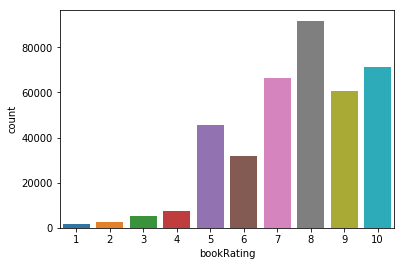

In [435]:
sns.countplot(data= ratings_new, x = "bookRating")

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [436]:
more_100 = pd.DataFrame(ratings_new['userID'].value_counts() > 99)
more = more_100[more_100['userID'] == True].index
more # more contains all the userID who have rated atleast 100 books 

Int64Index([ 11676,  98391, 189835, 153662,  23902, 235105,  76499, 171118,
             16795, 248718,
            ...
            117384,  36299, 169682, 211919, 156300,  95010,  33145,  26544,
            208406,  36609],
           dtype='int64', length=449)

In [437]:
(ratings_new['userID'].value_counts() > 99 ).sum()

449

In [438]:
ratings_new = ratings_new[ratings_new['userID'].isin(more)]
ratings_new

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
1477,277427,0062507109,8
1483,277427,0132220598,8
1488,277427,0140283374,6
1490,277427,014039026X,8
1491,277427,0140390715,7


In [439]:
len(ratings_new['userID'].value_counts()>99) # conforming for filltering 

449

In [440]:
book_data1 = pd.merge(ratings_new, book1, on='ISBN')
book_data1.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,52584,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,110934,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [441]:
"""
from sklearn.model_selection import train_test_split

trainDF, tempDF = train_test_split(ratings_new, test_size = 0.2, random_state = 100)
"""


'\nfrom sklearn.model_selection import train_test_split\n\ntrainDF, tempDF = train_test_split(ratings_new, test_size = 0.2, random_state = 100)\n'

In [442]:
"""
testDF = tempDF.copy()
testDF.head()
testDF.shape
trainDF.shape 
"""

'\ntestDF = tempDF.copy()\ntestDF.head()\ntestDF.shape\ntrainDF.shape \n'

In [443]:
"""
ratings = pd.concat([trainDF, tempDF])
print (ratings.shape)
ratings.head()
"""

'\nratings = pd.concat([trainDF, tempDF])\nprint (ratings.shape)\nratings.head()\n'

In [444]:
R_df = ratings_new.pivot(index = 'userID', columns = 'ISBN', values = 'bookRating').fillna(0)
R_df.head()
R_df.shape

(449, 66572)

In [445]:
R_df.isna().sum().sum()

0

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [446]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df, k = 50)

In [447]:
sigma

array([147.92121613, 149.3438051 , 150.07400599, 152.20116297,
       152.87416391, 154.61308307, 154.80093432, 155.95760177,
       158.05646578, 159.21079484, 159.81670657, 162.01963916,
       162.77851768, 163.33054635, 166.02489324, 166.8162391 ,
       168.04972004, 170.77485167, 171.01325686, 173.29428498,
       174.57624968, 176.65724713, 178.61913749, 180.29517222,
       182.25079063, 184.10706957, 187.61687534, 189.75276623,
       190.96966388, 195.14643609, 199.83133018, 201.70083339,
       202.18713912, 203.48697581, 207.26449173, 209.92986988,
       213.23598777, 216.88280493, 224.26954726, 231.66186197,
       235.67095629, 249.9581775 , 252.02866425, 261.24756904,
       267.98197504, 281.0120779 , 293.69539562, 379.58327277,
       634.72875357, 680.30978318])

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [448]:
userID = 2110

In [449]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [450]:
sigma = np.diag(sigma)

In [451]:
sigma

array([[147.92121613,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.3438051 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07400599, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58327277,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.72875357,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.30978318]])

In [452]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [453]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = R_df.columns)
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


In [454]:
def recommend_books(predictions_df, userID,userId, books_df, original_ratings_df, num_recommendations = False):
    user_row_number = userID - 1   #UserID starts at zero not 1
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending = False)
    
    user_data = original_ratings_df[original_ratings_df.userID == (userId)]
    user_full = (user_data.merge(books_df, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False)
                )
    print('User {0} has already rated {1} books.'.format(userID, user_full.dropna().shape[0]))
    print('Recommending the highest {0} predicted ratings books not already read.'.format(num_recommendations))
    
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, user_data, user_full
#R_df = rating.pivot(index = 'userID', columns = 'ISBN', values = 'bookRating').fillna(0)

In [455]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_books(preds_df, 2,2110, book1, ratings_new, 10)

User 2 has already rated 103 books.
Recommending the highest 10 predicted ratings books not already read.


In [456]:
already_rated

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
76,2110,067166865X,10,STAR TREK YESTERDAY'S SON (Star Trek: The Orig...,A.C. Crispin,1988,Audioworks
52,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997,Apple
64,2110,0590629786,10,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic
63,2110,0590629778,10,"The Invasion (Animorphs, No 1)",K. A. Applegate,1996,Scholastic
61,2110,059046678X,10,The Yearbook,Peter Lerangis,1994,Scholastic
55,2110,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
93,2110,0812505042,10,The Time Machine,H. G. Wells,1995,Tor Books
54,2110,0590213040,10,The Andalite's Gift (Animorphs : Megamorphs 1),K. A. Applegate,1997,Scholastic
53,2110,0590109960,10,Watchers #1: Last Stop,Peter Lerangis,1998,Scholastic
82,2110,0679805265,10,Long Shot (Three Investigators Crimebusters (P...,Megan Stine,1993,Random House Children's Books


In [457]:
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
2435,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
6048,0451167317,The Dark Half,Stephen King,1994,Signet Book


In [458]:
sorted_user_predictions

ISBN
059035342X    0.682444
0345370775    0.368946
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
0451151259    0.313295
0439139597    0.305088
0439064872    0.290587
0380759497    0.278563
0345353145    0.250941
0451167317    0.249254
0439136369    0.242676
0618002235    0.239957
0880389117    0.239552
0618002227    0.239242
0451160525    0.234959
0446310786    0.231819
0451173317    0.229402
0440213525    0.228038
0060392452    0.227935
0439136350    0.226968
0345335287    0.223613
1560768304    0.221496
0441845630    0.221496
0451156609    0.221396
0451180232    0.221054
0345317580    0.219552
0451142934    0.218949
0312980140    0.218348
0670835382    0.216858
                ...   
0553576925   -0.042664
0688088686   -0.043207
0786000899   -0.043301
0553567683   -0.043553
042518630X   -0.043825
0671673661   -0.044025
0345361571   -0.044076
042517770X   -0.044668
0446603090   -0.044738
0684195984   -0.047424
0684195976   -0.047690
0679405283   -0.047838
055380

### User Data

In [459]:
user_data

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5
14455,2110,015216250X,8
14457,2110,0345260627,10
14458,2110,0345283554,10
14459,2110,0345283929,10
14460,2110,034528710X,10


In [461]:
user_data.shape

(103, 3)

In [462]:
user_full

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
76,2110,067166865X,10,STAR TREK YESTERDAY'S SON (Star Trek: The Orig...,A.C. Crispin,1988,Audioworks
52,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997,Apple
64,2110,0590629786,10,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic
63,2110,0590629778,10,"The Invasion (Animorphs, No 1)",K. A. Applegate,1996,Scholastic
61,2110,059046678X,10,The Yearbook,Peter Lerangis,1994,Scholastic
55,2110,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
93,2110,0812505042,10,The Time Machine,H. G. Wells,1995,Tor Books
54,2110,0590213040,10,The Andalite's Gift (Animorphs : Megamorphs 1),K. A. Applegate,1997,Scholastic
53,2110,0590109960,10,Watchers #1: Last Stop,Peter Lerangis,1998,Scholastic
82,2110,0679805265,10,Long Shot (Three Investigators Crimebusters (P...,Megan Stine,1993,Random House Children's Books


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [463]:
user_data_2100 = ratings_new[ratings_new['userID'] == 2110]
user_data_2100.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [464]:
user_data_2100.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [465]:
user_full_info = user_data_2100.merge(book1,how = 'left' , left_on ='ISBN' , right_on = 'ISBN')
user_full_info=user_full_info.drop(columns=['userID','bookRating'],axis=1)

In [466]:
user_full_info.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0060987529,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
2,0140022651,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,0142302163,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,0151008116,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [467]:
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
2435,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
6048,0451167317,The Dark Half,Stephen King,1994,Signet Book


In [468]:
sorted_user_predictions1 = preds_df.loc[2].sort_values(ascending = False)

In [469]:
recommendations = (book1[~book1['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions1).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').rename(columns = {2: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                   iloc[:10, :-1])

In [470]:
recommendations

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
407,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2116,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey
2438,0440214041,The Pelican Brief,John Grisham,1993,Dell
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
521,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
20670,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey
4810,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books
6320,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks
44448,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books
8977,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic
